#Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading datasets

In [77]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [78]:
# Save participant_id before dropping it from the test DataFrame
# which is used in creating submission file

test_participant_ids = test['participant_id']
train = train.drop('participant_id', axis=1)
test = test.drop('participant_id', axis=1)

numerical_cols=['focus_intensity','consistency_score']  #numerical columns

numerical=train[numerical_cols]
numerical_test=test[numerical_cols]
categorical=train.drop(columns=numerical_cols)

#EDA

In [79]:
#check how many null cells are there
train.isnull().sum()

,0
age_group,0
identity_code,0
cultural_background,0
upbringing_influence,0
focus_intensity,0
consistency_score,0
external_guidance_usage,0
support_environment_score,0
hobby_engagement_level,0
physical_activity_index,0


##Boxplot

<Axes: xlabel='variable', ylabel='value'>

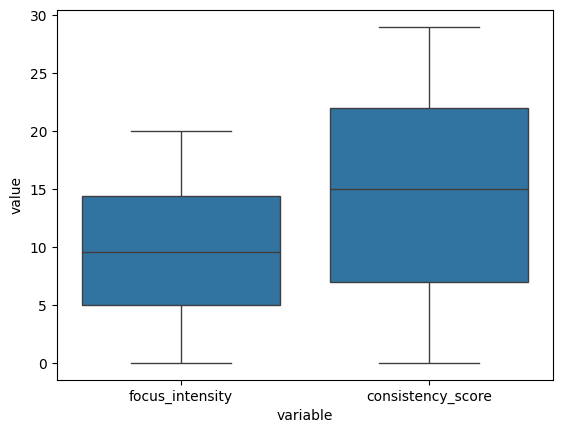

In [80]:
# Boxplot
df_for_boxplot = train[['focus_intensity', 'consistency_score']].melt()
sns.boxplot(x='variable', y='value', data=df_for_boxplot)


##Correlation Heatmap

,focus_intensity,consistency_score
count,1913.000000,1913.000000
mean,9.748506,14.618400
std,5.702764,8.485326
min,0.008031,0.000000
25%,4.958649,7.000000
50%,9.518844,15.000000
75%,14.407464,22.000000
max,19.968425,29.000000


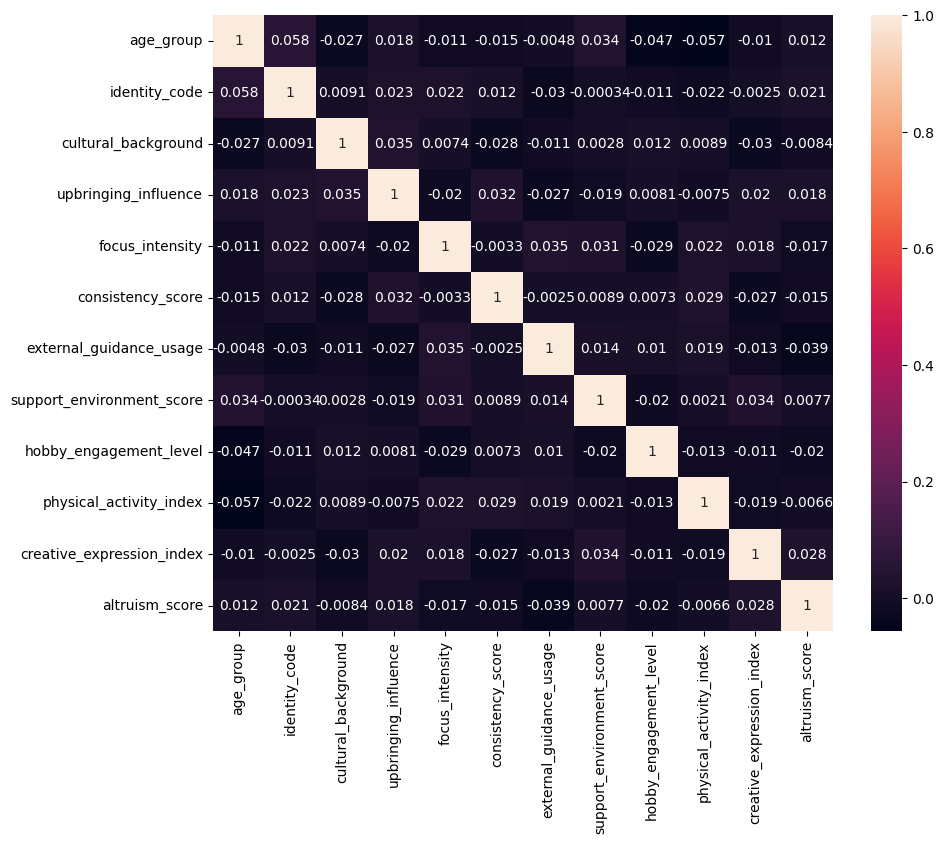

In [81]:
# Select only numeric columns for correlation calculation
plt.figure(figsize=(10, 8)) # Adjust width and height as needed
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True)
numerical.describe()

##Categorical Features Distribution Analysis

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


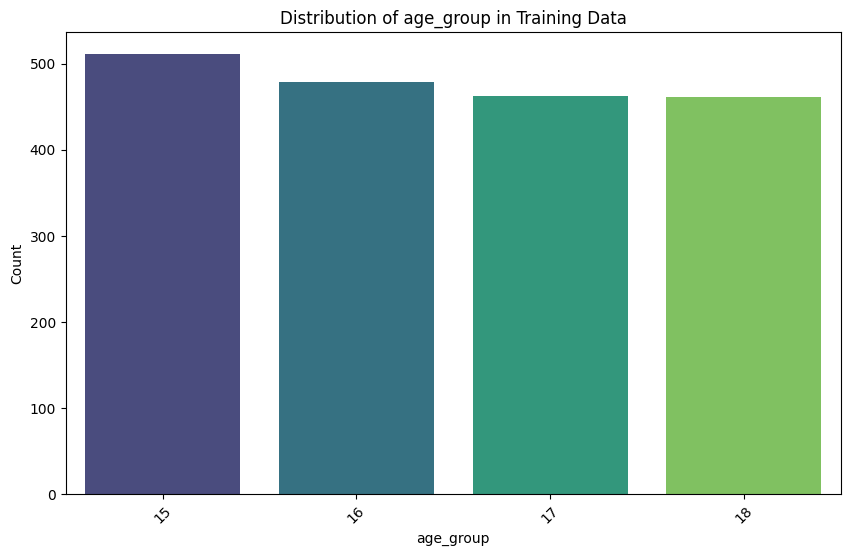

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


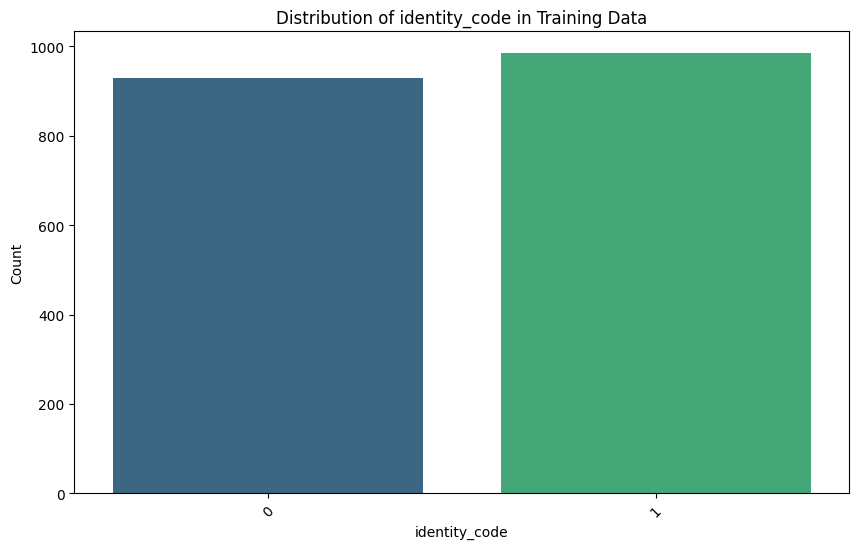

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


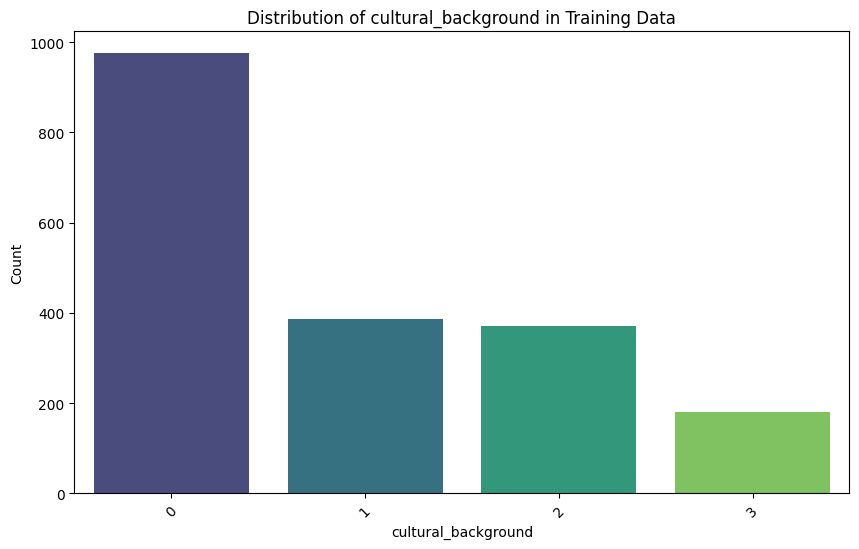

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


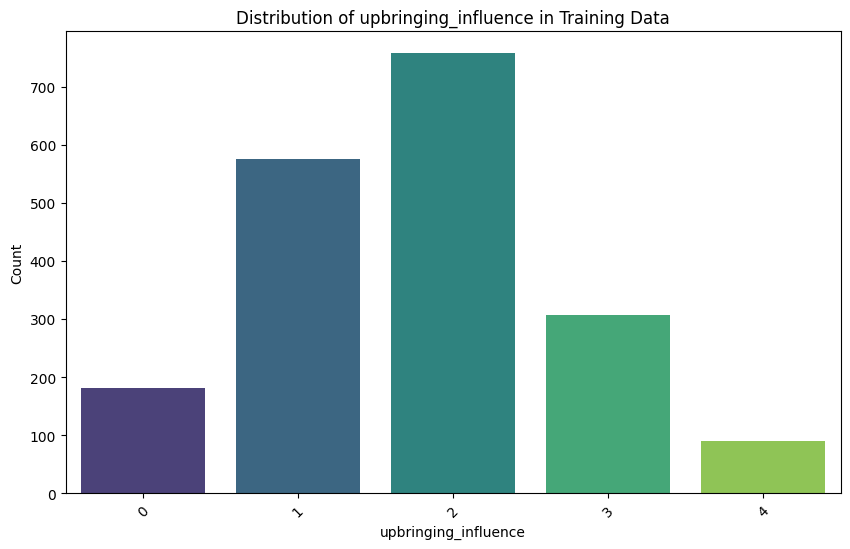

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


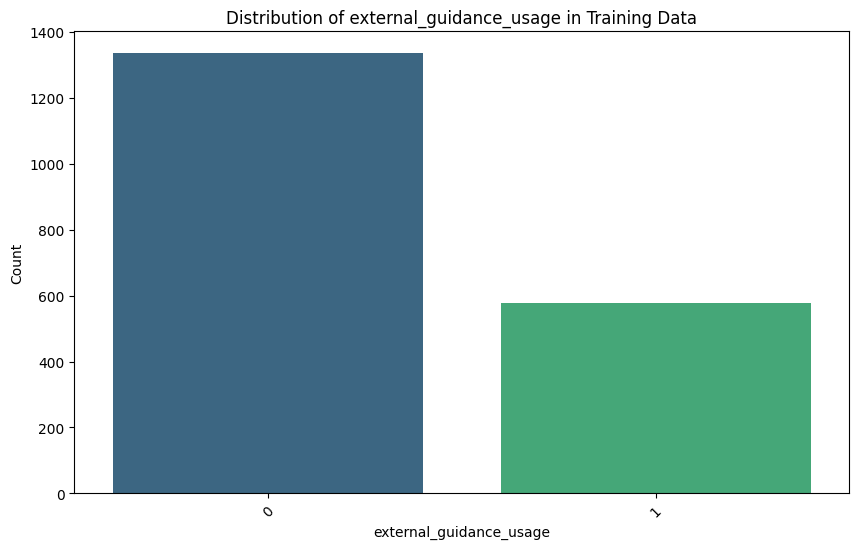

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


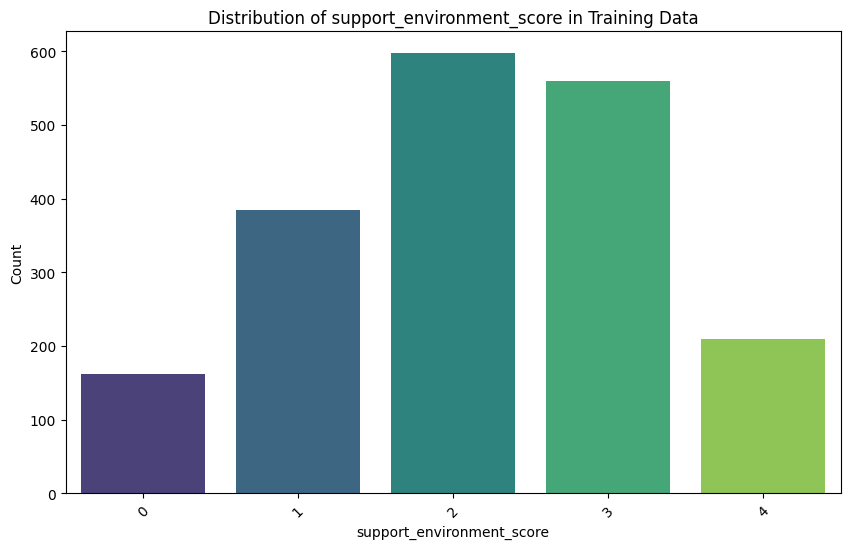

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


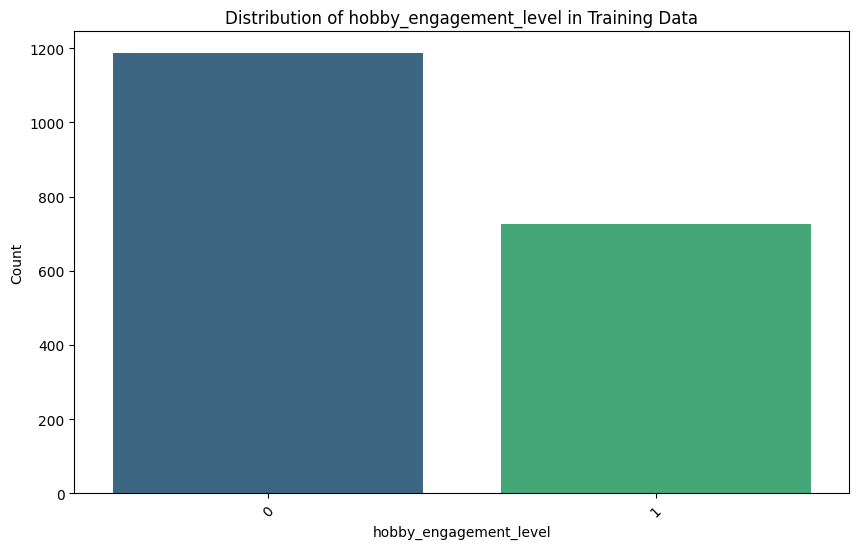

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


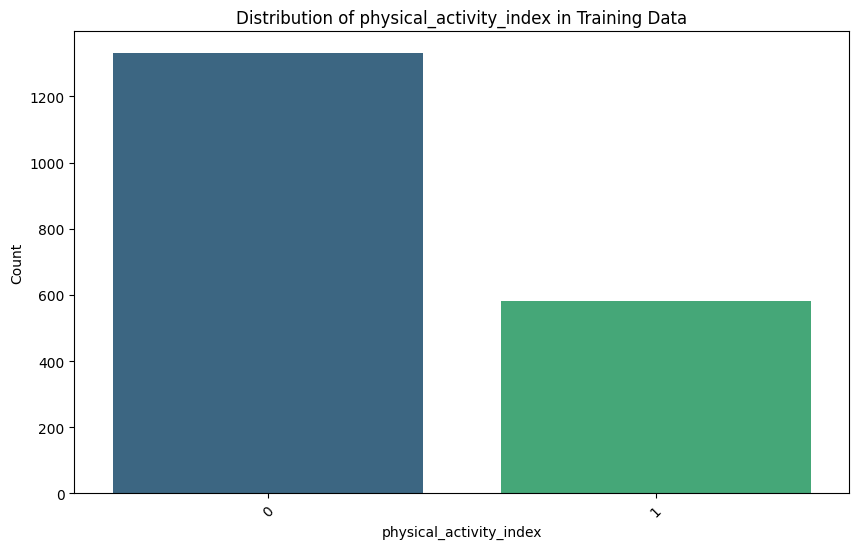

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


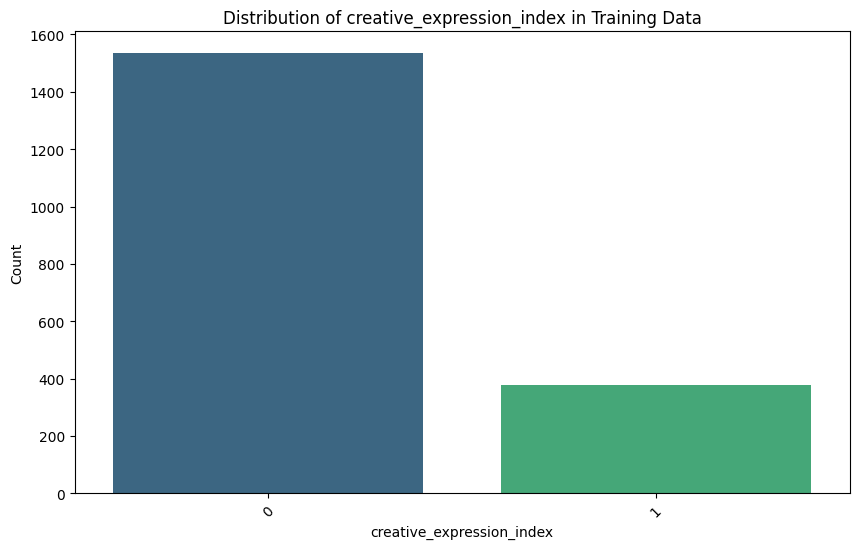

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


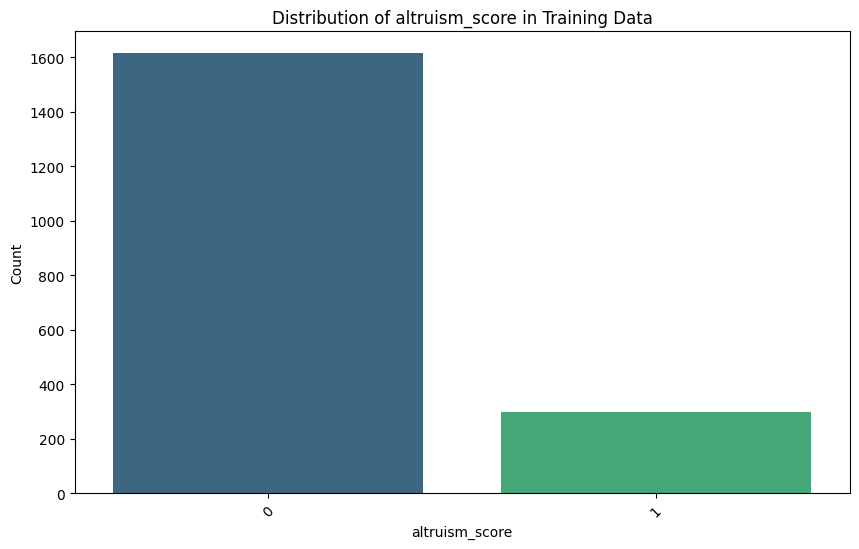

/tmp/ipython-input-1944944852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=categorical, palette='viridis')


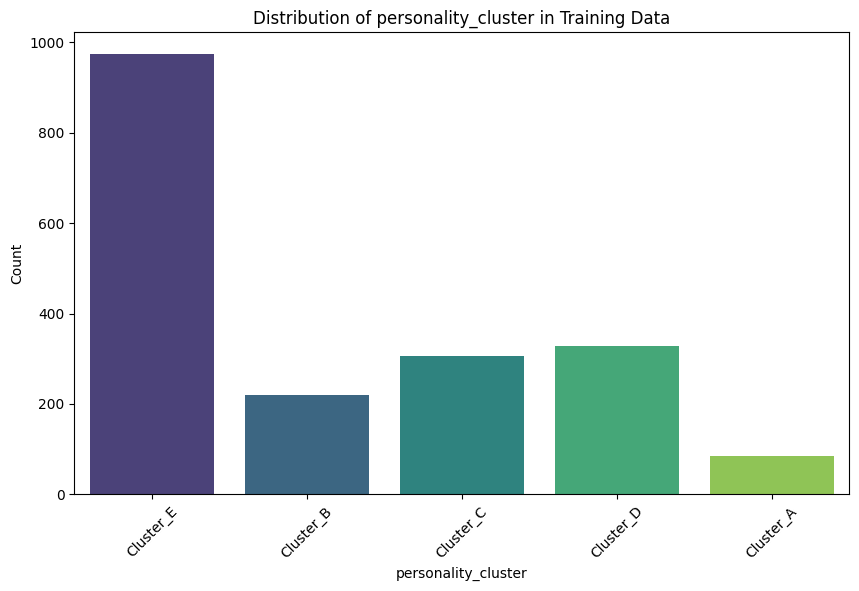

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of categorical columns
categorical_cols = categorical.columns

# Loop through each categorical column and create a bar plot
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=categorical, palette='viridis')
    plt.title(f'Distribution of {col} in Training Data')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split
x = train.drop('personality_cluster', axis=1).values
y = train['personality_cluster'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Data PreProcessing

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


#Our dataset gives better results without any scaling required.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# test=scaler.transform(test)

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# test=scaler.transform(test)

# scaler = RobustScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# test=scaler.transform(test)

#Logistic Regression Model

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score

# ------------------------------------------------------------
# 2. Define Logistic Regression Model
# ------------------------------------------------------------
log_reg = LogisticRegression(max_iter=5000)

# ------------------------------------------------------------
# 3. Hyperparameter Grid
# ------------------------------------------------------------
param_grid = {
    "C": [1,0.1,100],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}


grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid_lr.fit(x_train, y_train)

print("Best Parameters:", grid_lr.best_params_)

y_pred = grid_lr.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy: 0.7180156657963447
F1 Score: 0.6944139244710051

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.42      0.48      0.44        42
           2       0.55      0.52      0.53        64
           3       0.61      0.60      0.61        60
           4       0.87      0.95      0.91       195

    accuracy                           0.72       383
   macro avg       0.49      0.51      0.50       383
weighted avg       0.67      0.72      0.69       383



#SVM Model

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 2. Define SVM Model
svm = SVC()

# ------------------------------------------------------------
# 3. Hyperparameter Grid
# ------------------------------------------------------------
param_grid = {
    "C": [0.3],
    "kernel": ["linear"],
    "gamma": ["auto"]
}

# ------------------------------------------------------------
# 4. GridSearchCV
# ------------------------------------------------------------
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid_svm.fit(x_train, y_train)

print("Best Parameters:", grid_svm.best_params_)

y_pred = grid_svm.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'C': 0.3, 'gamma': 'auto', 'kernel': 'linear'}

Accuracy: 0.7493472584856397
F1 Score: 0.7287692094473418

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.44      0.55      0.49        42
           2       0.66      0.61      0.63        64
           3       0.64      0.70      0.67        60
           4       0.89      0.94      0.91       195

    accuracy                           0.75       383
   macro avg       0.53      0.56      0.54       383
weighted avg       0.71      0.75      0.73       383



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Neural Networks Model

##using keras

In [87]:
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, f1_score


num_classes = len(le.classes_)
# Define a third neural network model with a deeper architecture
model_nn_v3 = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the new model
model_nn_v3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Display model summary
model_nn_v3.summary()

# Train the model with early stopping
history_v3 = model_nn_v3.fit(
    x_train, y_train_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test_one_hot),
    callbacks=[early_stop],       # <-- Early Stopping added here
    verbose=1
)

# Evaluate
loss_v3, accuracy_v3 = model_nn_v3.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"\nNeural Network v3 Test Accuracy: {accuracy_v3:.4f}")

# Predictions
y_pred_nn_prob_v3 = model_nn_v3.predict(x_test)
y_pred_nn_v3 = tf.argmax(y_pred_nn_prob_v3, axis=1).numpy()

# Classification report
print("\nNeural Network v3 Classification Report:")
print(classification_report(y_test, y_pred_nn_v3))

# F1 Score
f1 = f1_score(y_test, y_pred_nn_v3, average='weighted')
print("Neural Network v3 F1 Score (weighted):", f1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,805 (175.02 KB)

 Trainable params: 44,805 (175.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5343 - loss: 1.2441 - val_accuracy: 0.6736 - val_loss: 0.8515
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6512 - loss: 0.9505 - val_accuracy: 0.6945 - val_loss: 0.8123
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - loss: 0.8859 - val_accuracy: 0.6945 - val_loss: 0.7900
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7037 - loss: 0.8676 - val_accuracy: 0.7154 - val_loss: 0.7459
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7049 - loss: 0.8384 - val_accuracy: 0.7285 - val_loss: 0.7178
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7313 - loss: 0.8236 - val_accuracy: 0.7520 - val_loss: 0.6997
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7336 - loss: 0.8111 - val_accuracy: 0.7572 - val_loss: 0.6841
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7308 - loss: 0.8021 - val_accuracy: 0.7572 - val_loss:

##using MLP classifier

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# ------------------------------------------------------------
# 2. Base MLP model (your hyperparameters)
# ------------------------------------------------------------
mlp = MLPClassifier(
    activation='relu',
    solver='adam',
    early_stopping=True,

    random_state=42
)

# ------------------------------------------------------------
# 3. GridSearch Parameter Grid
# ------------------------------------------------------------
param_grid = {
    "hidden_layer_sizes": [
        (300, 150, 75)
    ],
    "alpha": [0.001],
    "validation_fraction":[0.16],
    "learning_rate_init": [0.0005],
    "batch_size": [16],
    "max_iter": [300]   # fixed as per your design
}

# ------------------------------------------------------------
# 4. GridSearchCV
# ------------------------------------------------------------
grid = GridSearchCV(
    mlp,
    param_grid,
    scoring="f1_weighted",
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("\n Best Parameters:", grid.best_params_)
print(" Best CV Score:", grid.best_score_)

best_mlp = grid.best_estimator_
best_mlp.fit(x_train, y_train)

y_pred_mlp = best_mlp.predict(x_test)

print("\nMLPClassifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

print("\nMLPClassifier Classification Report:")
print(classification_report(y_test, y_pred_mlp, zero_division=0))

f1 = f1_score(y_test, y_pred_mlp, average='weighted')
print("\nMLPClassifier F1 Score (weighted):", f1)


Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Best Parameters: {'alpha': 0.001, 'batch_size': 16, 'hidden_layer_sizes': (300, 150, 75), 'learning_rate_init': 0.0005, 'max_iter': 300, 'validation_fraction': 0.16}
 Best CV Score: 0.7191002740937594

MLPClassifier Accuracy: 0.7362924281984334

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.05      0.08        22
           1       0.45      0.57      0.51        42
           2       0.57      0.66      0.61        64
           3       0.61      0.55      0.58        60
           4       0.91      0.93      0.92       195

    accuracy                           0.74       383
   macro avg       0.61      0.55      0.54       383
weighted avg       0.73      0.74      0.72       383


MLPClassifier F1 Score (weighted): 0.7217857763471317


#Submission File creation

In [89]:
import pandas as pd

y_pred_labels = grid_lr.predict(test)

prediction = pd.DataFrame({
    'participant_id': test_participant_ids.values,
    'personality_cluster': y_pred_labels
})

display(prediction.head())

prediction['personality_cluster'] = le.inverse_transform(prediction['personality_cluster'])

display(prediction.head())

prediction.to_csv('submission_lr.csv', index=False)

print("✔ submission_mlp.csv created successfully!")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,participant_id,personality_cluster
0,1005,4
1,197,2
2,2343,4
3,1709,1
4,436,4


,participant_id,personality_cluster
0,1005,Cluster_E
1,197,Cluster_C
2,2343,Cluster_E
3,1709,Cluster_B
4,436,Cluster_E


✔ submission_mlp.csv created successfully!


##for keras

In [90]:
import tensorflow as tf
import pandas as pd

# Make predictions on the preprocessed test data using the neural network model
y_pred_prob = model_nn_v3.predict(test)

# Convert probabilities to class labels (0, 1, 2, 3, 4)
y_pred_labels = tf.argmax(y_pred_prob, axis=1).numpy()

# Create a DataFrame for submission
prediction = pd.DataFrame({'participant_id': test_participant_ids.values, 'personality_cluster': y_pred_labels})

# Display the head of the prediction DataFrame before inverse transformation
display(prediction.head())

# Reverse label encode the 'personality_cluster' predictions back to original string labels
prediction['personality_cluster'] = le.inverse_transform(prediction['personality_cluster'])

# Display the updated prediction DataFrame with original cluster names
display(prediction.head())

# Save the final predictions to a CSV file
prediction.to_csv('submission_nn_vfinal.csv', index=False)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,participant_id,personality_cluster
0,1005,4
1,197,2
2,2343,4
3,1709,1
4,436,4


,participant_id,personality_cluster
0,1005,Cluster_E
1,197,Cluster_C
2,2343,Cluster_E
3,1709,Cluster_B
4,436,Cluster_E
